In [1]:
# Import packages and functions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans

In [2]:
# Load dataset
geyser = pd.read_csv('oldfaithful.csv')
geyser

,Eruption,Waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


Text(0, 0.5, 'Waiting time (min)')

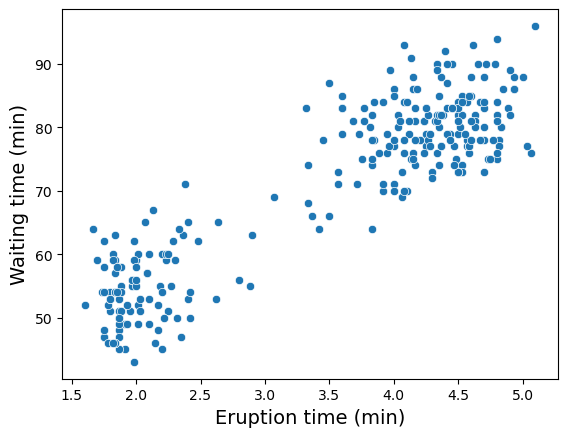

In [3]:
# Visual exploration
p = sns.scatterplot(data=geyser, x='Eruption', y='Waiting')
p.set_xlabel('Eruption time (min)', fontsize=14)
p.set_ylabel('Waiting time (min)', fontsize=14)

In [4]:
# Initialize a k-means model with k=2
kmModel = KMeans(n_clusters=2)

# Fit the model
kmModel = kmModel.fit(geyser)

# Save the cluster centroids
centroids = kmModel.cluster_centers_
centroids[1]

/Users/slauer/anaconda3/envs/py3_10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 2.09433, 54.75   ])

In [5]:
# Save the cluster assignments
clusters = kmModel.fit_predict(geyser[['Eruption', 'Waiting']])

# View the clusters for the first five instances
clusters[0:5]

/Users/slauer/anaconda3/envs/py3_10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 1, 0], dtype=int32)

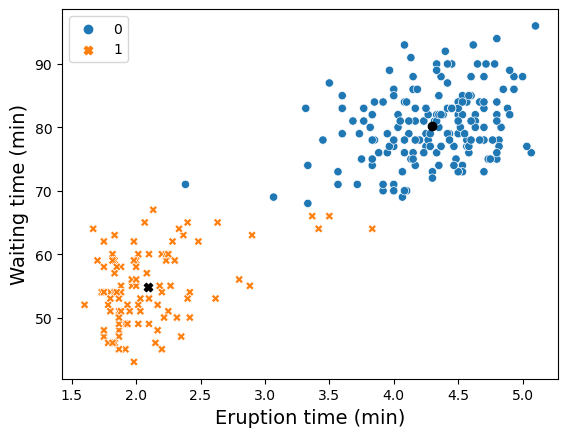

In [6]:
# Plot clusters
p = sns.scatterplot(
    data=geyser, x='Eruption', y='Waiting', hue=clusters, style=clusters
)
p.set_xlabel('Eruption time (min)', fontsize=14)
p.set_ylabel('Waiting time (min)', fontsize=14)

# Add centroid for cluster 0
plt.scatter(x=centroids[0, 0], y=centroids[0, 1], c='black')

# Add centroid for cluster 1
plt.scatter(x=centroids[1, 0], y=centroids[1, 1], c='black', marker='X')

In [7]:
# Fit k-means clustering with k=1,...,5 and save WCSS for each
WCSS = []
k = [1, 2, 3, 4, 5]
for j in k:
    kmModel = KMeans(n_clusters=j)
    kmModel = kmModel.fit(geyser)
    WCSS.append(kmModel.inertia_)

/Users/slauer/anaconda3/envs/py3_10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/slauer/anaconda3/envs/py3_10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/slauer/anaconda3/envs/py3_10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/slauer/anaconda3/envs/py3_10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

Text(0, 0.5, 'Within-cluster sum of squares (WCSS)')

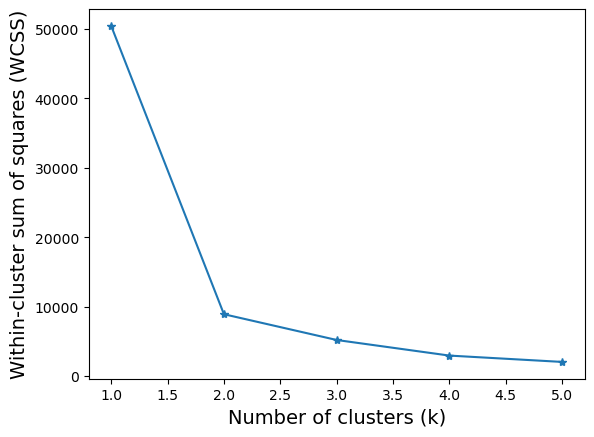

In [8]:
# Plot the WCSS for each cluster
ax = plt.figure().gca()
plt.plot(k, WCSS, '*-')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize=14)